In [1]:
# importing important libraried
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from datetime import datetime
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Preprocessing libraries
from sklearn.preprocessing import LabelEncoder

# Encoding Categorical Fetures:
encoder = LabelEncoder()
def Encode(df,x):
    for i in x:
        df[i] = encoder.fit_transform(df[i])



from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import xgboost as xgb
from xgboost.sklearn import XGBClassifier


#




In [2]:
# import data
train= pd.read_csv('Train.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     87020 non-null  object 
 1   Gender                 87020 non-null  object 
 2   City                   86017 non-null  object 
 3   Monthly_Income         87020 non-null  int64  
 4   DOB                    87020 non-null  object 
 5   Lead_Creation_Date     87020 non-null  object 
 6   Loan_Amount_Applied    86949 non-null  float64
 7   Loan_Tenure_Applied    86949 non-null  float64
 8   Existing_EMI           86949 non-null  float64
 9   Employer_Name          86949 non-null  object 
 10  Salary_Account         75256 non-null  object 
 11  Mobile_Verified        87020 non-null  object 
 12  Var5                   87020 non-null  int64  
 13  Var1                   87020 non-null  object 
 14  Loan_Amount_Submitted  52407 non-null  float64
 15  Lo

In [4]:
train.head(20)

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,Var5,Var1,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,HDFC Bank,N,0,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,0
1,ID000004E40,Male,Mumbai,35000,7-Oct-85,4-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),ICICI Bank,Y,13,HBXA,200000.0,2.0,13.25,NaN,6762.90,N,Web-browser,G,S122,3,0,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,State Bank of India,Y,0,HBXX,450000.0,4.0,NaN,NaN,NaN,N,Web-browser,B,S143,1,0,0
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,9-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,State Bank of India,Y,10,HBXX,920000.0,5.0,NaN,NaN,NaN,N,Web-browser,B,S143,3,0,0
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,HDFC Bank,Y,17,HBXX,500000.0,2.0,NaN,NaN,NaN,N,Web-browser,B,S134,3,1,0
5,ID000010K00,Male,Bengaluru,45000,21-Apr-82,20-May-15,300000.0,5.0,15000.0,COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD,HSBC,Y,17,HAXM,300000.0,5.0,13.99,1500.0,6978.92,N,Web-browser,B,S143,3,1,0
6,ID000011L10,Female,Sindhudurg,70000,23-Oct-87,1-May-15,6.0,5.0,0.0,CARNIVAL CRUISE LINE,Yes Bank,N,0,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,B,S133,1,0,0
7,ID000012M20,Male,Bengaluru,20000,25-Jul-75,20-May-15,200000.0,5.0,2597.0,GOLDEN TULIP FLORITECH PVT. LTD,NaN,Y,3,HBXX,200000.0,5.0,NaN,NaN,NaN,N,Web-browser,B,S159,3,0,0
8,ID000013N30,Male,Kochi,75000,26-Jan-72,2-May-15,0.0,0.0,0.0,SIIS PVT LTD,State Bank of India,Y,13,HAXB,1300000.0,5.0,14.85,26000.0,30824.65,Y,Mobile,C,S122,5,0,0
9,ID000014O40,Female,Mumbai,30000,12-Sep-89,3-May-15,300000.0,3.0,0.0,SOUNDCLOUD.COM,Kotak Bank,Y,0,HBXC,300000.0,3.0,18.25,1500.0,10883.38,N,Web-browser,B,S133,1,0,0


In [5]:
train.describe(include = 'all')

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,Var5,Var1,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
count,87020,87020,86017,8.702000e+04,87020,87020,8.694900e+04,86949.000000,8.694900e+04,86949,75256,87020,87020.000000,87020,5.240700e+04,52407.000000,27726.000000,27420.000000,27726.000000,87020,87020,87020,87020,87020.000000,87020.000000,87020.000000
unique,87020,2,697,NaN,11345,92,NaN,NaN,NaN,43567,57,2,NaN,19,NaN,NaN,NaN,NaN,NaN,2,2,7,30,NaN,NaN,NaN
top,ID013250Q00,Male,Delhi,NaN,11-Nov-80,3-Jul-15,NaN,NaN,NaN,0,HDFC Bank,Y,NaN,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,B,S122,NaN,NaN,NaN
freq,1,49848,12527,NaN,306,2315,NaN,NaN,NaN,4914,17695,56481,NaN,59294,NaN,NaN,NaN,NaN,NaN,67530,64316,37280,38567,NaN,NaN,NaN
mean,NaN,NaN,NaN,5.884997e+04,NaN,NaN,2.302507e+05,2.131399,3.696228e+03,NaN,NaN,NaN,4.961503,NaN,3.950106e+05,3.891369,19.197474,5131.150839,10999.528377,NaN,NaN,NaN,NaN,2.949805,0.029350,0.014629
std,NaN,NaN,NaN,2.177511e+06,NaN,NaN,3.542068e+05,2.014193,3.981021e+04,NaN,NaN,NaN,5.670385,NaN,3.082481e+05,1.165359,5.834213,4725.837644,7512.323050,NaN,NaN,NaN,NaN,1.697720,0.168785,0.120062
min,NaN,NaN,NaN,0.000000e+00,NaN,NaN,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN,0.000000,NaN,5.000000e+04,1.000000,11.990000,200.000000,1176.410000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,1.650000e+04,NaN,NaN,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN,0.000000,NaN,2.000000e+05,3.000000,15.250000,2000.000000,6491.600000,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
50%,NaN,NaN,NaN,2.500000e+04,NaN,NaN,1.000000e+05,2.000000,0.000000e+00,NaN,NaN,NaN,2.000000,NaN,3.000000e+05,4.000000,18.000000,4000.000000,9392.970000,NaN,NaN,NaN,NaN,3.000000,0.000000,0.000000
75%,NaN,NaN,NaN,4.000000e+04,NaN,NaN,3.000000e+05,4.000000,3.500000e+03,NaN,NaN,NaN,11.000000,NaN,5.000000e+05,5.000000,20.000000,6250.000000,12919.040000,NaN,NaN,NaN,NaN,5.000000,0.000000,0.000000


In [6]:
train.isnull().sum()

ID                           0
Gender                       0
City                      1003
Monthly_Income               0
DOB                          0
Lead_Creation_Date           0
Loan_Amount_Applied         71
Loan_Tenure_Applied         71
Existing_EMI                71
Employer_Name               71
Salary_Account           11764
Mobile_Verified              0
Var5                         0
Var1                         0
Loan_Amount_Submitted    34613
Loan_Tenure_Submitted    34613
Interest_Rate            59294
Processing_Fee           59600
EMI_Loan_Submitted       59294
Filled_Form                  0
Device_Type                  0
Var2                         0
Source                       0
Var4                         0
LoggedIn                     0
Disbursed                    0
dtype: int64

In [7]:
train.columns

Index(['ID', 'Gender', 'City', 'Monthly_Income', 'DOB', 'Lead_Creation_Date', 'Loan_Amount_Applied', 'Loan_Tenure_Applied', 'Existing_EMI', 'Employer_Name', 'Salary_Account', 'Mobile_Verified', 'Var5', 'Var1', 'Loan_Amount_Submitted', 'Loan_Tenure_Submitted', 'Interest_Rate', 'Processing_Fee', 'EMI_Loan_Submitted', 'Filled_Form', 'Device_Type', 'Var2', 'Source', 'Var4', 'LoggedIn', 'Disbursed'], dtype='object')

In [8]:
cat_feat = ['Gender', 'Mobile_Verified', 'Var1',
           'Filled_Form', 'Device_Type','Var2', 'Source']

for i in cat_feat:
    print('\n Count of Variable: \n', i)
    print(train[i].value_counts())
    


 Count of Variable: 
 Gender
Male      49848
Female    37172
Name: Gender, dtype: int64

 Count of Variable: 
 Mobile_Verified
Y    56481
N    30539
Name: Mobile_Verified, dtype: int64

 Count of Variable: 
 Var1
HBXX    59294
HBXC     9010
HBXB     4479
HAXA     2909
HBXA     2123
HAXB     2011
HBXD     1964
HAXC     1536
HBXH      970
HCXF      722
HAYT      508
HAVC      384
HAXM      268
HCXD      237
HCYS      217
HVYS      186
HAZD      109
HCXG       78
HAXF       15
Name: Var1, dtype: int64

 Count of Variable: 
 Filled_Form
N    67530
Y    19490
Name: Filled_Form, dtype: int64

 Count of Variable: 
 Device_Type
Web-browser    64316
Mobile         22704
Name: Device_Type, dtype: int64

 Count of Variable: 
 Var2
B    37280
G    33032
C    14210
E     1315
D      634
F      544
A        5
Name: Var2, dtype: int64

 Count of Variable: 
 Source
S122    38567
S133    29885
S159     5599
S143     4332
S127     1931
S137     1724
S134     1301
S161      769
S151      720
S157      6

In [9]:
# lets determine age from DOB
train['DOB']= pd.to_datetime(train.DOB)
train['DOB'].head()

0   1978-05-23
1   1985-10-07
2   1981-10-10
3   1987-11-30
4   1984-02-17
Name: DOB, dtype: datetime64[ns]

In [10]:
now = pd.to_datetime('2016-01-01')
now

Timestamp('2016-01-01 00:00:00')

In [11]:
train['Age'] = train['DOB'].apply(lambda x: now.year - x.year)
train.drop('DOB',axis = 1, inplace = True)

In [12]:
train['Age']

0        38
1        31
2        35
3        29
4        32
         ..
87015   -53
87016    26
87017    44
87018    39
87019    28
Name: Age, Length: 87020, dtype: int64

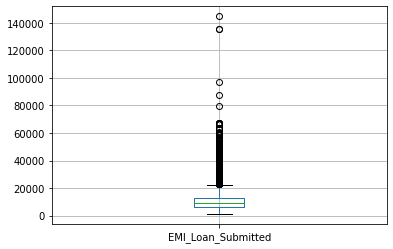

In [13]:
train.boxplot(column = ['EMI_Loan_Submitted'])

In [14]:
# We see here a lot number of values are not there 
# let's create a column which says is it null or not
train['Missing_EMI_Loan_Submitted'] = train['EMI_Loan_Submitted'].apply(lambda x:1 if pd.isnull(x) else 0)
train['Missing_Processing_Fee'] = train['Processing_Fee'].apply(lambda x : 1 if pd.isnull(x) else 0)
train['Loan_Amount_Submitted'] = train['Loan_Amount_Submitted'].apply(lambda x : 1 if pd.isnull(x) else 0)
train['Loan_Tenure_Submitted'] = train['Loan_Tenure_Submitted'].apply(lambda x : 1 if pd.isnull(x) else 0)
train['Interest_Rate'] = train['Interest_Rate'].apply(lambda x: 1 if pd.isnull(x) else 0)
train.drop('EMI_Loan_Submitted', axis = 1, inplace =True)
train.drop('Processing_Fee',axis =1 , inplace =True)
train.drop('Loan_Amount_Submitted',axis =1, inplace =True)
train.drop('Loan_Tenure_Submitted',axis = 1, inplace =True)
train.drop('Interest_Rate',axis =1 , inplace =True)
train.head()

,ID,Gender,City,Monthly_Income,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,Var5,Var1,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed,Age,Missing_EMI_Loan_Submitted,Missing_Processing_Fee
0,ID000002C20,Female,Delhi,20000,15-May-15,300000.0,5.0,0.0,CYBOSOL,HDFC Bank,N,0,HBXX,N,Web-browser,G,S122,1,0,0,38,1,1
1,ID000004E40,Male,Mumbai,35000,4-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),ICICI Bank,Y,13,HBXA,N,Web-browser,G,S122,3,0,0,31,0,1
2,ID000007H20,Male,Panchkula,22500,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,State Bank of India,Y,0,HBXX,N,Web-browser,B,S143,1,0,0,35,1,1
3,ID000008I30,Male,Saharsa,35000,9-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,State Bank of India,Y,10,HBXX,N,Web-browser,B,S143,3,0,0,29,1,1
4,ID000009J40,Male,Bengaluru,100000,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,HDFC Bank,Y,17,HBXX,N,Web-browser,B,S134,3,1,0,32,1,1


In [15]:
# deleting these columns as they have too many unique values
train.drop(['City'],axis = 1, inplace = True)
train.drop(['Employer_Name'],axis=1, inplace =True)
train.drop(['Salary_Account'],axis = 1, inplace =True)
train.drop(['Lead_Creation_Date'],axis = 1, inplace =True)


In [16]:
train['Source'] = train['Source'].apply(lambda x: 'others' if x not in ['S122', 'S133','S159','S143'] else x)
train['Var1'] = train['Var1'].apply(lambda x: 'others' if x not in ['HBXX','HBXC','HBXB','HBXA','HAXA', 'HAXB', 'HBXD'] else x)

# getting dummie columns
mob_vari = pd.get_dummies(train['Mobile_Verified'],drop_first= True)
var1 = pd.get_dummies(train['Var1'],columns = ['var1'], drop_first=True)
formfill = pd.get_dummies(train['Filled_Form'],drop_first=True)
device = pd.get_dummies(train['Device_Type'],drop_first = True)
var2  = pd.get_dummies(train['Var2'],drop_first =True)
source =pd.get_dummies(train['Source'],columns = ['source'],drop_first =True)


train = pd.concat([train,mob_vari,var1,formfill,device,var2,source])

In [17]:
train = pd.get_dummies(train,columns = cat_feat,drop_first =True)

In [18]:
train.head()

,ID,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Var5,Var4,LoggedIn,Disbursed,Age,Missing_EMI_Loan_Submitted,Missing_Processing_Fee,Gender_Male,Mobile_Verified_Y,Var1_HAXB,Var1_HBXA,Var1_HBXB,Var1_HBXC,Var1_HBXD,Var1_HBXX,Var1_others,Filled_Form_Y,Device_Type_Web-browser,Var2_B,Var2_C,Var2_D,Var2_E,Var2_F,Var2_G,Source_S133,Source_S143,Source_S159,Source_others
0,ID000002C20,20000,300000.0,5.0,0.0,0,1,0,0,38,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
1,ID000004E40,35000,200000.0,2.0,0.0,13,3,0,0,31,0,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,ID000007H20,22500,600000.0,4.0,0.0,0,1,0,0,35,1,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0
3,ID000008I30,35000,1000000.0,5.0,0.0,10,3,0,0,29,1,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0
4,ID000009J40,100000,500000.0,2.0,25000.0,17,3,1,0,32,1,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1


In [19]:
# filling NA values:
train['Loan_Amount_Applied'].fillna(train['Loan_Amount_Applied'].median(),inplace =True)
train['Loan_Tenure_Applied'].fillna(train['Loan_Tenure_Applied'].median(),inplace =True)

In [20]:
train['Existing_EMI'].isnull().sum()

71

In [21]:
train['Existing_EMI'].fillna(0,inplace= True)

In [22]:
train.isnull().sum()

ID                            0
Monthly_Income                0
Loan_Amount_Applied           0
Loan_Tenure_Applied           0
Existing_EMI                  0
Var5                          0
Var4                          0
LoggedIn                      0
Disbursed                     0
Age                           0
Missing_EMI_Loan_Submitted    0
Missing_Processing_Fee        0
Gender_Male                   0
Mobile_Verified_Y             0
Var1_HAXB                     0
Var1_HBXA                     0
Var1_HBXB                     0
Var1_HBXC                     0
Var1_HBXD                     0
Var1_HBXX                     0
Var1_others                   0
Filled_Form_Y                 0
Device_Type_Web-browser       0
Var2_B                        0
Var2_C                        0
Var2_D                        0
Var2_E                        0
Var2_F                        0
Var2_G                        0
Source_S133                   0
Source_S143                   0
Source_S

In [23]:
#train.to_csv('Processed_train')